In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:01.057503


In [40]:
%%time
data = pd.read_csv('NY property data.csv')

CPU times: user 2.05 s, sys: 424 ms, total: 2.47 s
Wall time: 2.66 s


In [3]:
data.shape

(1070994, 32)

In [4]:
numrecords = len(data)
print(numrecords)

1070994


In [5]:
# %%time
# import pandas_profiling
# data.profile_report(correlations={"cramers": {"calculate": False}})
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file('NY stats.html')

In [244]:
len(data.EXT.unique())

4

In [6]:
data.dtypes

RECORD        int64
BBLE         object
BORO          int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [48]:
data.head()

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [14]:
#count % populated for numeric

print('RECORD', data.RECORD.notnull().sum()/len(data))
print('BORO', data.BORO.notnull().sum()/len(data))
print('BLOCK', data.BLOCK.notnull().sum()/len(data))         
print('LOT', data.LOT.notnull().sum()/len(data))         
print('LTFRONT', data.LTFRONT.notnull().sum()/len(data))    
print('LTDEPTH', data.LTDEPTH.notnull().sum()/len(data))  
print('STORIES', data.STORIES.notnull().sum()/len(data))     
print('FULLVAL', data.FULLVAL.notnull().sum()/len(data))     
print('AVLAND', data.AVLAND.notnull().sum()/len(data))      
print('AVTOT', data.AVTOT.notnull().sum()/len(data))     
print('EXLAND', data.EXLAND.notnull().sum()/len(data))    
print('EXTOT', data.EXTOT.notnull().sum()/len(data))    
print('EXCD1', data.EXCD1.notnull().sum()/len(data))      
print('ZIP', data.ZIP.notnull().sum()/len(data))       
print('BLDFRONT', data.BLDFRONT.notnull().sum()/len(data))    
print('BLDDEPTH', data.BLDDEPTH.notnull().sum()/len(data))     
print('AVLAND2', data.AVLAND2.notnull().sum()/len(data))   
print('AVTOT2', data.AVTOT2.notnull().sum()/len(data))     
print('EXLAND2', data.EXLAND2.notnull().sum()/len(data))   
print('EXTOT2', data.EXTOT2.notnull().sum()/len(data))     
print('EXCD2', data.EXCD2.notnull().sum()/len(data))      

RECORD 1.0
BORO 1.0
BLOCK 1.0
LOT 1.0
LTFRONT 1.0
LTDEPTH 1.0
STORIES 0.9474656253909919
FULLVAL 1.0
AVLAND 1.0
AVTOT 1.0
EXLAND 1.0
EXTOT 1.0
EXCD1 0.5961639374263534
ZIP 0.9720913469169762
BLDFRONT 1.0
BLDDEPTH 1.0
AVLAND2 0.26398467218303745
AVTOT2 0.2639902744553191
EXLAND2 0.08165218479281863
EXTOT2 0.12215567967701033
EXCD2 0.08678666733893935


In [7]:
#count unique values
print('BBLE', len(data['BBLE'].unique()))
print('EASEMENT', len(data['EASEMENT'].unique()))
print('OWNER', len(data['OWNER'].unique()))
print('BLDGCL', len(data['BLDGCL'].unique()))
print('TAXCLASS', len(data['TAXCLASS'].unique()))
print('EXT', len(data['EXT'].unique()))
print('STADDR', len(data['STADDR'].unique()))
print('EXMPTCL', len(data['EXMPTCL'].unique()))
print('PERIOD', len(data['PERIOD'].unique()))
print('YEAR', len(data['YEAR'].unique()))
print('VALTYPE', len(data['VALTYPE'].unique()))

BBLE 1070994
EASEMENT 13
OWNER 863348
BLDGCL 200
TAXCLASS 11
EXT 4
STADDR 839281
EXMPTCL 15
PERIOD 1
YEAR 1
VALTYPE 1


In [18]:
(data.RECORD==0).sum()

0

In [19]:
#count % of 0 
print('RECORD', (data.RECORD==0).sum()/len(data))
print('BORO', (data.BORO==0).sum()/len(data))
print('BLOCK', (data.BLOCK==0).sum()/len(data))         
print('LOT', (data.LOT==0).sum()/len(data))         
print('LTFRONT', (data.LTFRONT==0).sum()/len(data))    
print('LTDEPTH', (data.LTDEPTH==0).sum()/len(data))  
print('STORIES', (data.STORIES==0).sum()/len(data))     
print('FULLVAL', (data.FULLVAL==0).sum()/len(data))     
print('AVLAND', (data.AVLAND==0).sum()/len(data))      
print('AVTOT', (data.AVTOT==0).sum()/len(data))     
print('EXLAND', (data.EXLAND==0).sum()/len(data))    
print('EXTOT', (data.EXTOT==0).sum()/len(data))    
print('EXCD1', (data.EXCD1==0).sum()/len(data))      
print('ZIP', (data.ZIP==0).sum()/len(data))       
print('BLDFRONT', (data.BLDFRONT==0).sum()/len(data))    
print('BLDDEPTH', (data.BLDDEPTH==0).sum()/len(data))     
print('AVLAND2', (data.AVLAND2==0).sum()/len(data))   
print('AVTOT2', (data.AVTOT2==0).sum()/len(data))     
print('EXLAND2', (data.EXLAND2==0).sum()/len(data))   
print('EXTOT2', (data.EXTOT2==0).sum()/len(data))     
print('EXCD2', (data.EXCD2==0).sum()/len(data))   

RECORD 0.0
BORO 0.0
BLOCK 0.0
LOT 0.0
LTFRONT 0.15789817683385715
LTDEPTH 0.1588505631217355
STORIES 0.0
FULLVAL 0.012144792594543014
AVLAND 0.012146660018636892
AVTOT 0.012144792594543014
EXLAND 0.45910527976814064
EXTOT 0.40389768756874456
EXCD1 0.0
ZIP 0.0
BLDFRONT 0.21364732202047818
BLDDEPTH 0.21368280307826187
AVLAND2 0.0
AVTOT2 0.0
EXLAND2 0.0
EXTOT2 0.0
EXCD2 0.0


In [13]:
#count % populated

print('BBLE', data['BBLE'].notnull().sum()/len(data))
print('EASEMENT', data['EASEMENT'].notnull().sum()/len(data))
print('OWNER', data['OWNER'].notnull().sum()/len(data))
print('BLDGCL', data['BLDGCL'].notnull().sum()/len(data))
print('TAXCLASS', data['TAXCLASS'].notnull().sum()/len(data))
print('EXT', data['EXT'].notnull().sum()/len(data))
print('STADDR', data['STADDR'].notnull().sum()/len(data))
print('EXMPTCL', data['EXMPTCL'].notnull().sum()/len(data))
print('PERIOD', data['PERIOD'].notnull().sum()/len(data))
print('YEAR', data['YEAR'].notnull().sum()/len(data))
print('VALTYPE', data['VALTYPE'].notnull().sum()/len(data))

BBLE 1.0
EASEMENT 0.004328689049611856
OWNER 0.9703593110699033
BLDGCL 1.0
TAXCLASS 1.0
EXT 0.33081884679092505
STADDR 0.9993688106562688
EXMPTCL 0.014546299979271593
PERIOD 1.0
YEAR 1.0
VALTYPE 1.0


In [34]:
# print('BBLE', data['BBLE'].notnull().sum()/len(data))
print('EASEMENT', data['EASEMENT'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('OWNER', data['OWNER'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('BLDGCL', data['BLDGCL'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('TAXCLASS', data['TAXCLASS'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('EXT', data['EXT'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('STADDR', data['STADDR'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('EXMPTCL', data['EXMPTCL'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('PERIOD', data['PERIOD'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('YEAR', data['YEAR'].value_counts().sort_values(ascending=False).reset_index()['index'][0])
print('VALTYPE', data['VALTYPE'].value_counts().sort_values(ascending=False).reset_index()['index'][0])

EASEMENT E
OWNER PARKCHESTER PRESERVAT
BLDGCL R4
TAXCLASS 1
EXT G
STADDR 501 SURF AVENUE
EXMPTCL X1
PERIOD FINAL
YEAR 2010/11
VALTYPE AC-TR


In [20]:
# data.describe().to_csv('describe.csv')

In [8]:
data.head().transpose()

,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
BORO,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [9]:
data.tail().transpose()

,1070989,1070990,1070991,1070992,1070993
RECORD,1070990,1070991,1070992,1070993,1070994
BBLE,5080500083,5080500086,5080500089,5080500092,5080500094
BORO,5,5,5,5,5
BLOCK,8050,8050,8050,8050,8050
LOT,83,86,89,92,94
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,"TOBIN, GALE",SHERRI MILINAZZO,JOHN GERVASI,RITA M MOOG,EDWARD DONOHUE
BLDGCL,A1,A1,A1,A1,A1
TAXCLASS,1,1,1,1,1
LTFRONT,60,62,53,52,50


In [10]:
data.count()

RECORD      1070994
BBLE        1070994
BORO        1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

### explore each field 

In [11]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

In [12]:
len(data['RECORD'].unique())

1070994

In [13]:
len(data['RECORD'])

1070994

Text(0.5, 0, 'Record')

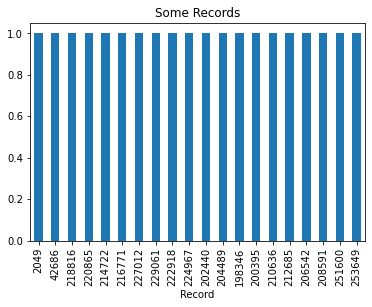

In [57]:
data['RECORD'].value_counts().head(20).plot(kind='bar')
plt.title('Some Records')
plt.xlabel('Record')

In [14]:
len(data['BBLE'].unique())

1070994

<AxesSubplot:>

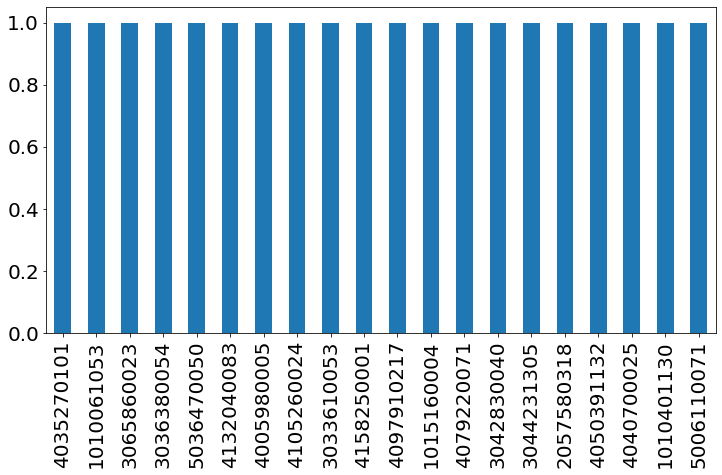

In [15]:
data['BBLE'].value_counts().head(20).plot(kind='bar')

In [16]:
len(data['BORO'].unique())

5

In [17]:
data['BORO'].count() * 100 / numrecords

100.0

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Queens'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Staten Island'),
  Text(4, 0, 'Bronx')])

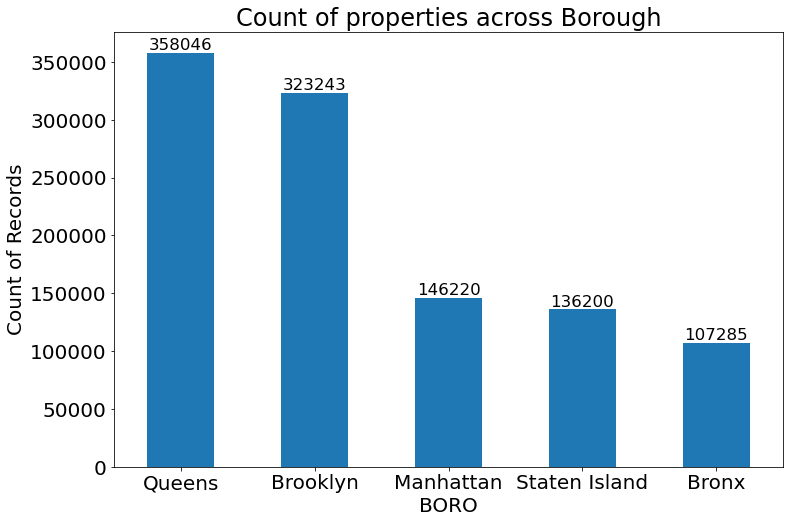

In [72]:
data['BORO'] = data['BORO'].replace([1, 2, 3, 4, 5],['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])
BORO = data['BORO'].value_counts()
data['BORO'].value_counts().plot(kind='bar')
j= 0
for i in BORO.index:    
        plt.text(j,BORO[i],BORO[i],ha = "center", va = "bottom", fontsize = 'small')  #,rotation = 30
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
# plt.rcParams.update({'font.size':20})
plt.xlabel('BORO')
plt.ylabel("Count of Records")
plt.title('Count of properties across Borough')
plt.savefig('plot.jpeg')       
plt.xticks(rotation=0)
# plt.savefig('plot')

In [19]:
data['BLOCK'].count() * 100 / numrecords

100.0

In [20]:
len(data['BLOCK'].unique())

13984

In [21]:
data['BLOCK'].min()

1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '3944'),
  Text(1, 0, '16'),
  Text(2, 0, '3943'),
  Text(3, 0, '3938'),
  Text(4, 0, '1171'),
  Text(5, 0, '3937'),
  Text(6, 0, '1833'),
  Text(7, 0, '2450'),
  Text(8, 0, '1047'),
  Text(9, 0, '7279'),
  Text(10, 0, '5893'),
  Text(11, 0, '8720'),
  Text(12, 0, '936'),
  Text(13, 0, '1115'),
  Text(14, 0, '1320'),
  Text(15, 0, '1140'),
  Text(16, 0, '1011'),
  Text(17, 0, '943'),
  Text(18, 0, '1116'),
  Text(19, 0, '1515')])

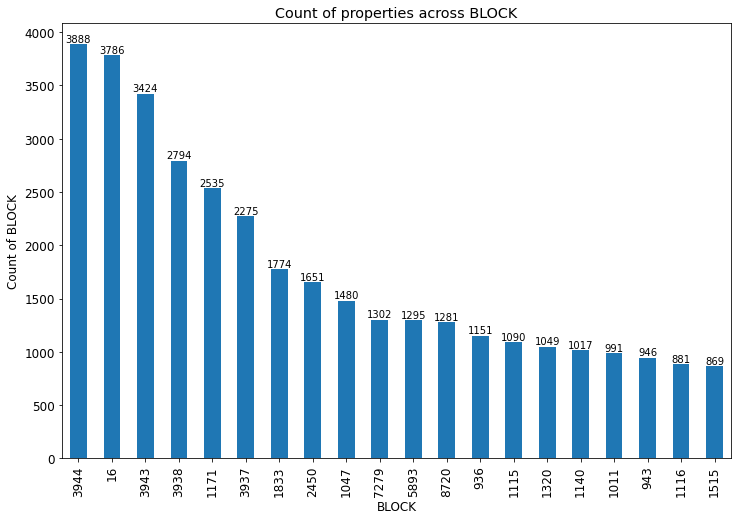

In [96]:
BLOCK = data['BLOCK'].value_counts().head(20)
data['BLOCK'].value_counts().head(20).plot(kind='bar')
j= 0
for i in BLOCK.index:    
        plt.text(j,BLOCK[i],BLOCK[i],ha = "center", va = "bottom", fontsize = 'small')  #,rotation = 30
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
# plt.rcParams.update({'font.size':20})
plt.xlabel('BLOCK')
plt.ylabel("Count of BLOCK")
plt.title('Count of properties across BLOCK')
# plt.savefig('plot.jpeg')       
plt.xticks(rotation=90)

In [23]:
data['LOT'].count() * 100 / numrecords

100.0

In [24]:
len(data['LOT'].unique())

6366

In [25]:
data['LOT'].value_counts()

1       24367
20      12294
15      12171
12      12143
14      12074
        ...  
5403        1
8036        1
4965        1
8037        1
4887        1
Name: LOT, Length: 6366, dtype: int64

In [26]:
data['LOT'].min()

1

Text(0.5, 1.0, 'Count of properties across LOT')

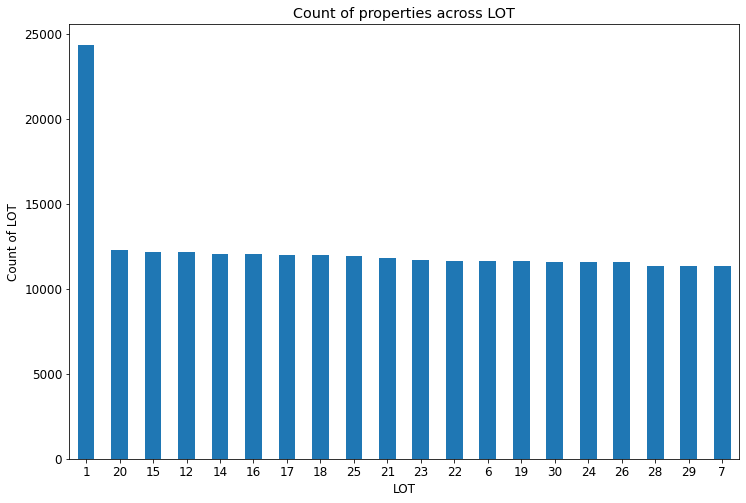

In [185]:
data['LOT'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('LOT')
plt.ylabel("Count of LOT")
plt.title('Count of properties across LOT')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Count of properties across LOT')

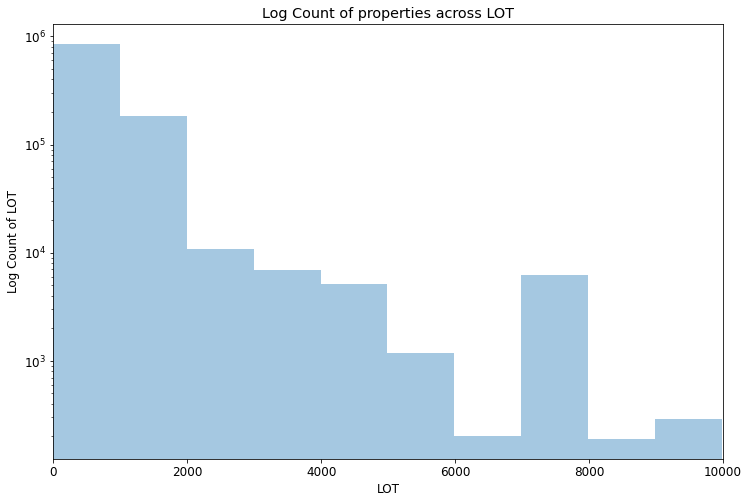

In [214]:
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['LOT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LOT'],bins=10, kde=False)
plt.xlabel('LOT')
plt.ylabel("Log Count of LOT")
plt.title('Log Count of properties across LOT')

In [29]:
data['EASEMENT'].count() * 100 / numrecords

0.4328689049611856

In [30]:
len(data['EASEMENT'].unique())

13

In [31]:
data['EASEMENT'].value_counts()

E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
P       3
L       3
M       2
U       1
Name: EASEMENT, dtype: int64

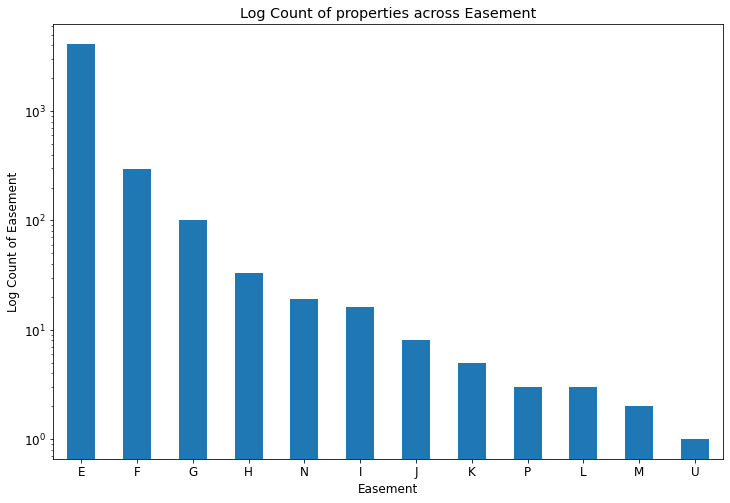

In [136]:
plt.yscale('log')
data['EASEMENT'].value_counts().head(20).plot(kind='bar')
plt.rcParams.update({'figure.figsize':(12, 8)})
plt.xticks(rotation=0)
plt.xlabel('Easement')
plt.ylabel("Log Count of Easement")
plt.title('Log Count of properties across Easement')
plt.savefig('plot.png')

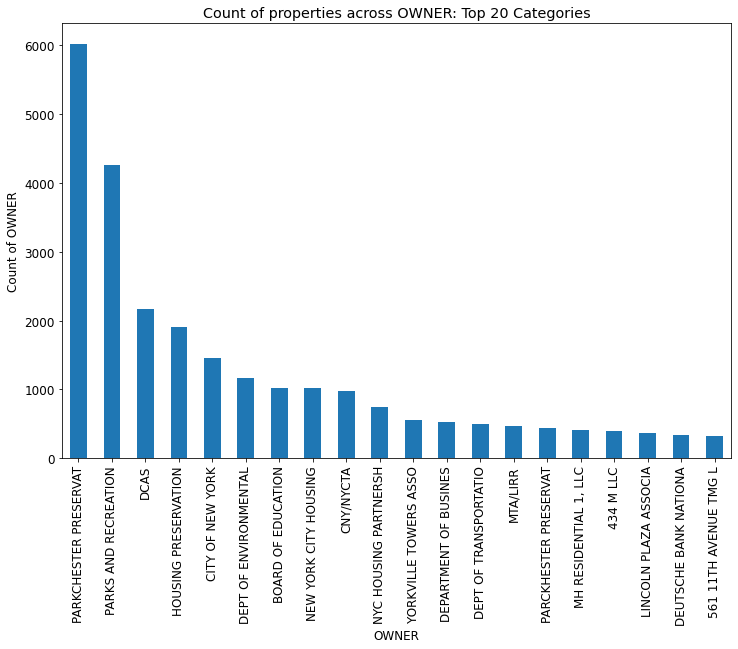

In [109]:
data['OWNER'].value_counts().head(20).plot(kind='bar')
plt.rcParams.update({'figure.figsize':(12,8)})
plt.rcParams.update({'font.size':12})
plt.xlabel('OWNER')
plt.ylabel("Count of OWNER")
plt.title('Count of properties across OWNER: Top 20 Categories')
# plt.xticks(rotation=20)
plt.savefig('plot')


In [34]:
data['OWNER'].count() * 100 / numrecords

97.03593110699033

In [35]:
len(data['OWNER'].unique())

863348

In [36]:
data['OWNER'].value_counts()

PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
                         ... 
JEROME J WALSH              1
RAFAEL A. PADILLA           1
GUCLEN GLORIA               1
LUCILLE DEMAIO              1
EDWARDS, CLIFTON            1
Name: OWNER, Length: 863347, dtype: int64

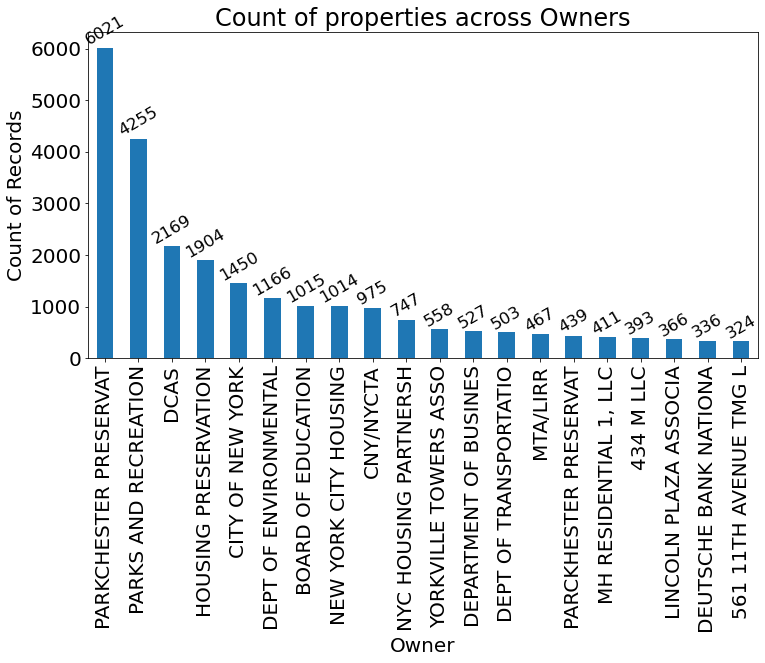

In [172]:
own = data['OWNER'].value_counts().head(20)

data['OWNER'].value_counts().head(20).plot(kind='bar')
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("Owner")
plt.ylabel("Count of Records")
plt.title('Count of properties across Owners')
plt.savefig('plot.jpeg')

In [37]:
len(data['BLDGCL'].unique())

200

In [38]:
data['BLDGCL'].count() * 100 / numrecords

100.0

In [39]:
data['BLDGCL'].value_counts()

R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
       ...  
I2         4
I3         4
H7         3
Y5         1
E6         1
Name: BLDGCL, Length: 200, dtype: int64

In [40]:
data[data['BLDGCL'] == 0]

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE


Text(0.5, 1.0, 'Count of properties across Building Class: Top 20 Categories')

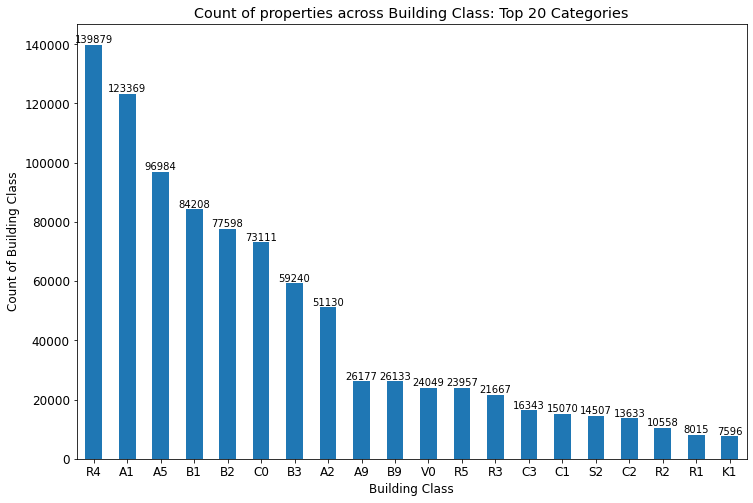

In [107]:
BLDGCL = data['BLDGCL'].value_counts().head(20)
data['BLDGCL'].value_counts().head(20).plot(kind='bar')
j= 0
for i in BLDGCL.index:    
        plt.text(j,BLDGCL[i],BLDGCL[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 0)
        j = j+1
plt.xticks(rotation=0)
plt.xlabel('Building Class')
plt.ylabel("Count of Building Class")
plt.title('Count of properties across Building Class: Top 20 Categories')


In [42]:
data['TAXCLASS'].count() * 100 / numrecords

100.0

In [43]:
len(data['TAXCLASS'].unique())

11

In [44]:
data['TAXCLASS'].value_counts()

1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: TAXCLASS, dtype: int64

Text(0.5, 1.0, 'Log Count of properties across Tax Class')

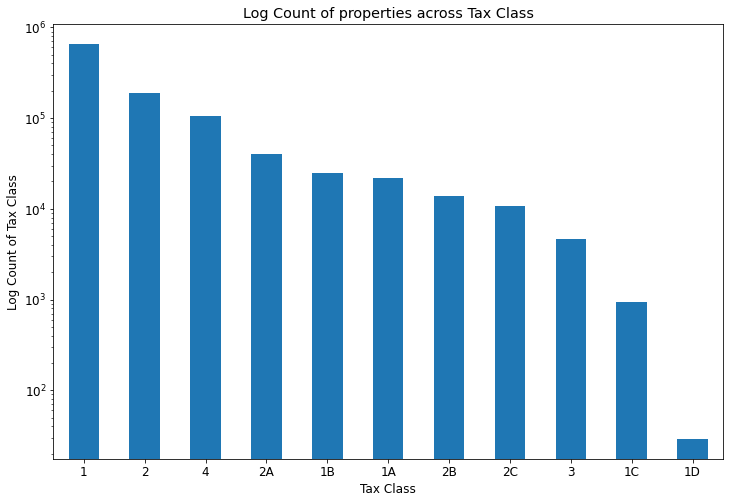

In [142]:
plt.yscale('log')
data['TAXCLASS'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xticks(rotation=0)
plt.xlabel('Tax Class')
plt.ylabel("Log Count of Tax Class")
plt.title('Log Count of properties across Tax Class')

In [46]:
data['LTFRONT'].count() * 100 / numrecords

100.0

In [216]:
len(data['LTFRONT'].unique())

1297

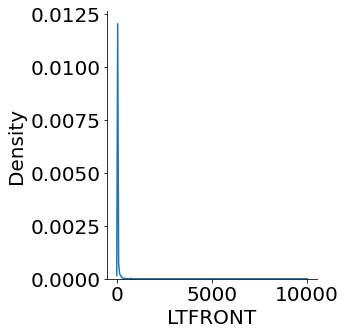

In [47]:
sns.displot(data['LTFRONT'], kind = 'kde')

<AxesSubplot:xlabel='LTFRONT'>

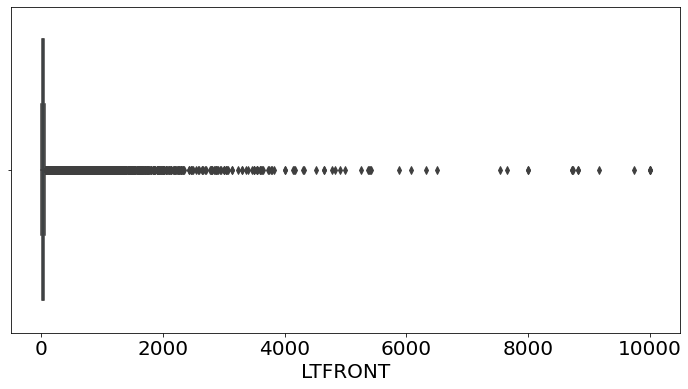

In [48]:
sns.boxplot(x='LTFRONT', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of properties across Lot Width')

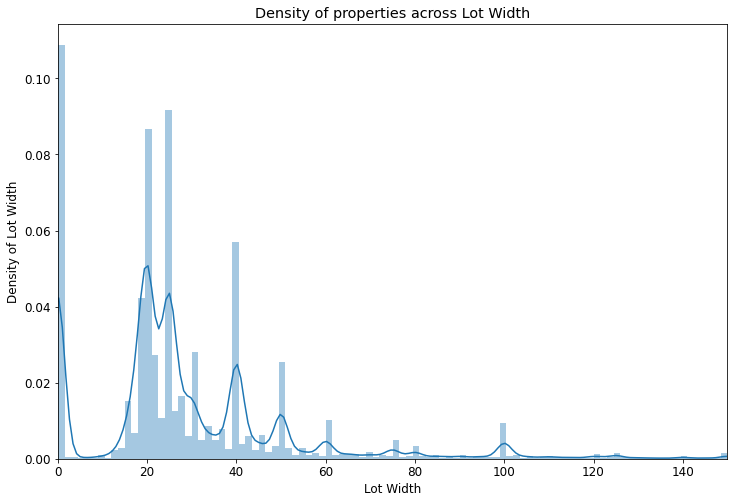

In [190]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins=100, kde=True)
plt.xlabel('Lot Width')
plt.ylabel("Density of Lot Width")
plt.title('Density of properties across Lot Width')

In [218]:
data['LTFRONT'] .value_counts()

0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1032         1
1461         1
2485         1
2059         1
1023         1
Name: LTFRONT, Length: 1297, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTFRONT'>

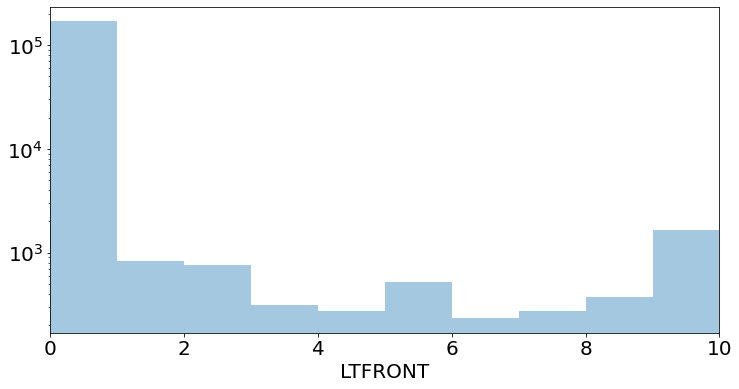

In [50]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTFRONT'],bins=10, kde=False)

<AxesSubplot:xlabel='LTDEPTH'>

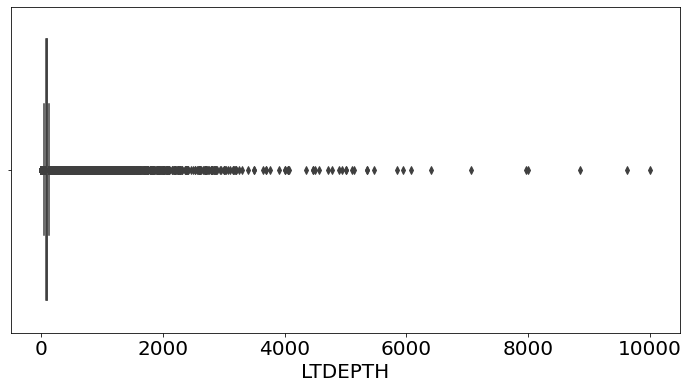

In [51]:
sns.boxplot(x='LTDEPTH', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of properties across Lot Depth')

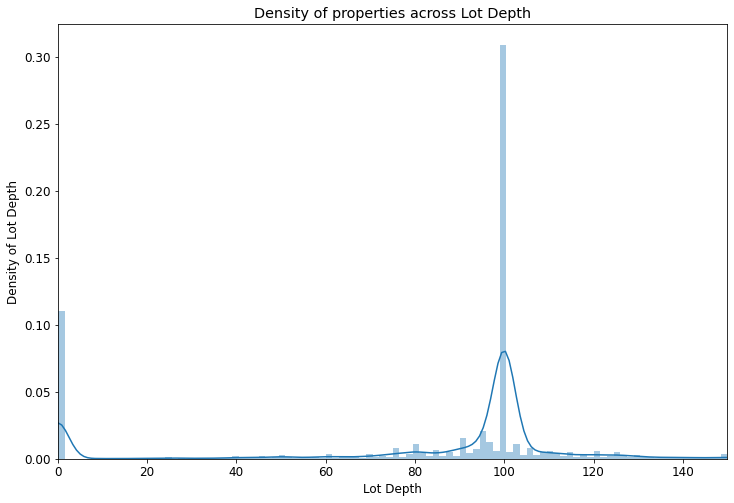

In [191]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
sns.distplot(temp['LTDEPTH'],bins=100, kde=True)
plt.xlabel('Lot Depth')
plt.ylabel("Density of Lot Depth")
plt.title('Density of properties across Lot Depth')

In [220]:
len(data.LTDEPTH.unique())
data['LTDEPTH'].count() * 100 / numrecords

100.0

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTDEPTH'>

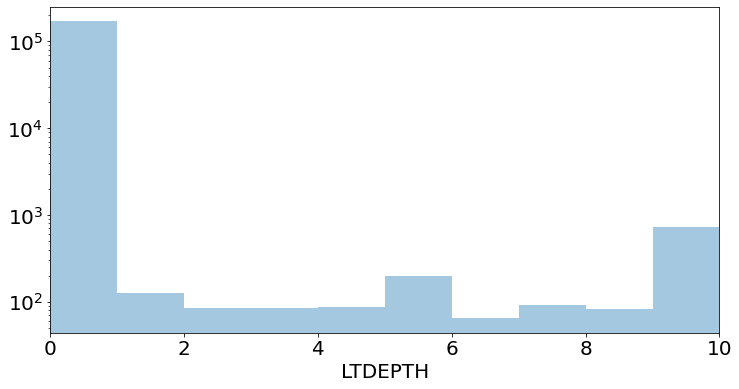

In [53]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTDEPTH'],bins=10, kde=False)

### Look at the number of sizes that are zero or unusually small. These aren't really zero, more likely they're missing data

In [54]:
len(data[data['LTFRONT']==0])

169108

In [55]:
len(data[data['LTFRONT']==1])

839

In [56]:
len(data[data["LTFRONT"]==2])

762

In [57]:
data['LTFRONT'].value_counts()

0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1032         1
1461         1
2485         1
2059         1
1023         1
Name: LTFRONT, Length: 1297, dtype: int64

In [58]:
data['LTDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='LTDEPTH'>

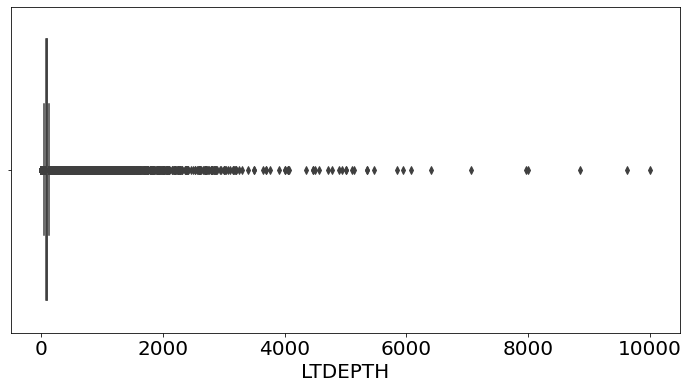

In [59]:
sns.boxplot(x='LTDEPTH', data=data)

In [60]:
len(data[data['LTDEPTH']==0])

170128

In [61]:
len(data[data['LTDEPTH']==1])

127

In [62]:
len(data[data["LTDEPTH"]==2])

84

In [63]:
data['LTDEPTH'].value_counts()

100     464541
0       170128
95       31612
90       20294
80       16671
         ...  
2276         1
3300         1
2278         1
2281         1
1471         1
Name: LTDEPTH, Length: 1370, dtype: int64

In [64]:
data['EXT'].value_counts()

G     266970
E      49442
EG     37893
Name: EXT, dtype: int64

In [65]:
data['EXT'].count() * 100 / numrecords

33.081884679092504

Text(0.5, 1.0, 'Count of properties across Extension Indicator')

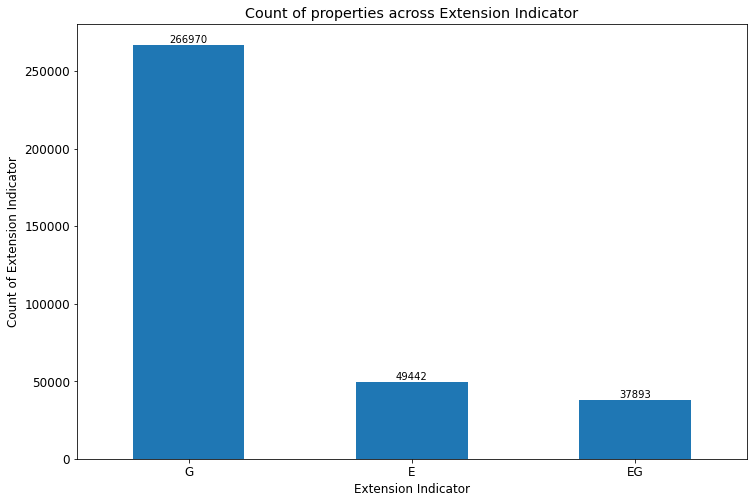

In [100]:
EXT = data['EXT'].value_counts().head(20)
data['EXT'].value_counts().plot(kind='bar')
j= 0
for i in EXT.index:    
        plt.text(j,EXT[i],EXT[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 0)
        j = j+1
plt.xticks(rotation=0)
plt.xlabel('Extension Indicator')
plt.ylabel("Count of Extension Indicator")
plt.title('Count of properties across Extension Indicator')


In [67]:
data['STORIES'].count() * 100 / numrecords

94.74656253909919

In [221]:
len(data['STORIES'].unique())

112

In [68]:
sum(pd.isnull(data['STORIES']))

56264

<AxesSubplot:xlabel='STORIES'>

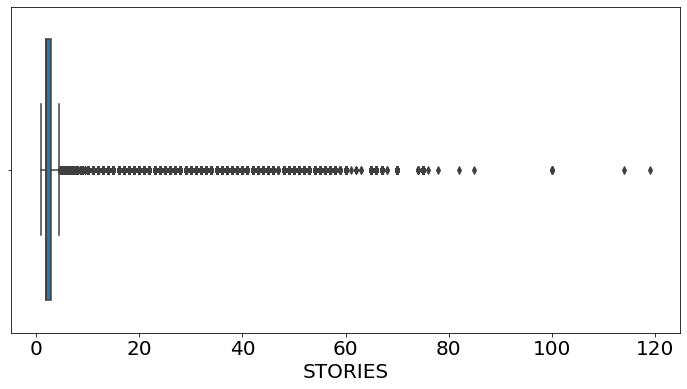

In [69]:
sns.boxplot(x='STORIES', data=data)

In [70]:
len(data[data['STORIES'] == 0])

0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Count of properties across Number of Stories in Building')

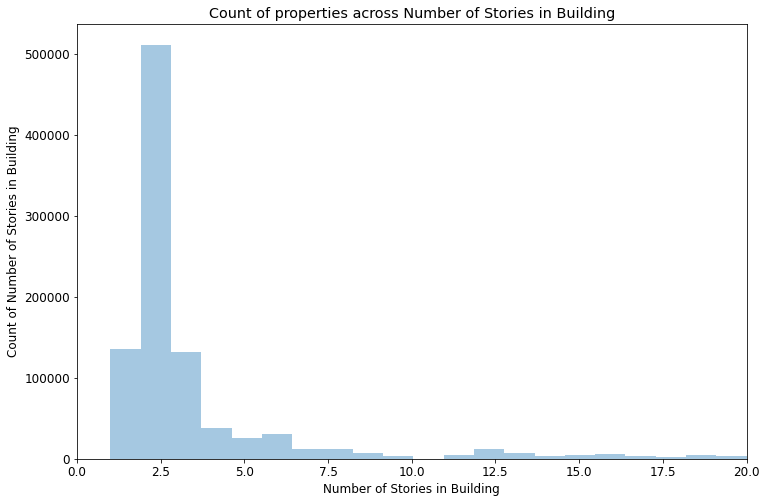

In [140]:
xhigh = 20
temp = data[data['STORIES'] > 0]
temp.count()
plt.xlim(0,xhigh)
temp = temp[temp['STORIES'] <= xhigh]
sns.distplot(temp['STORIES'],bins=21, kde=False)
plt.xticks(rotation=0)
plt.xlabel('Number of Stories in Building')
plt.ylabel("Count of Number of Stories in Building")
plt.title('Count of properties across Number of Stories in Building')


In [72]:
len(data[data['STORIES'] == 1])

96706

112

In [73]:
data['STORIES'].value_counts()

2.0      415092
3.0      130127
1.0       96706
2.5       82292
4.0       38342
          ...  
82.0          1
119.0         1
76.0          1
61.0          1
114.0         1
Name: STORIES, Length: 111, dtype: int64

In [223]:
len(data['FULLVAL'].unique())

109324

In [74]:
data['FULLVAL'].count() * 100 / numrecords

100.0

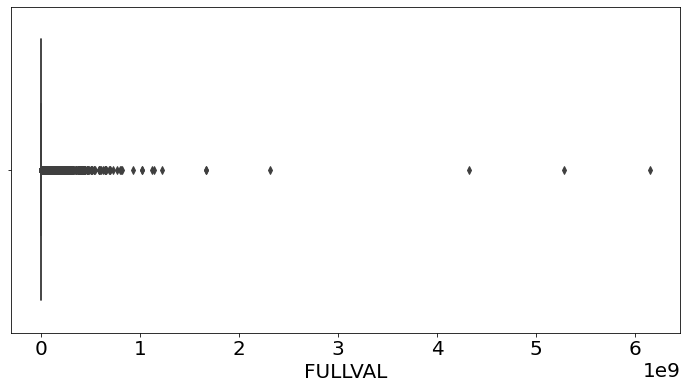

In [75]:
sns.boxplot(x='FULLVAL', data=data)
plt.savefig("boxplot.png")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


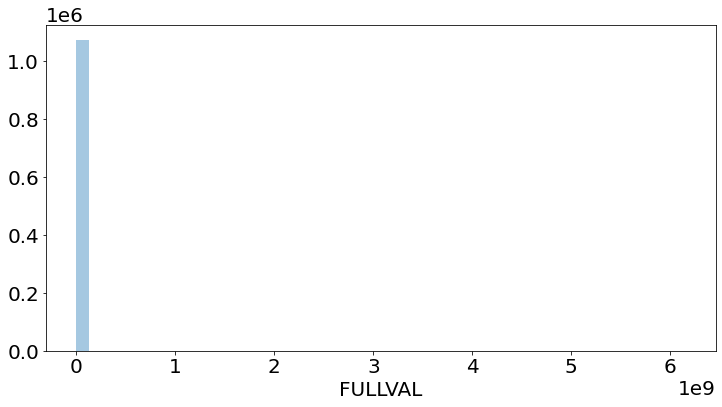

In [76]:
sns.distplot(data['FULLVAL'],kde=False)
plt.savefig('dist bad.png')

In [77]:
len(data[data['FULLVAL']==0])

13007

In [78]:
len(data[data['FULLVAL']==1])

0

In [79]:
len(data[data["FULLVAL"]==2])

0

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


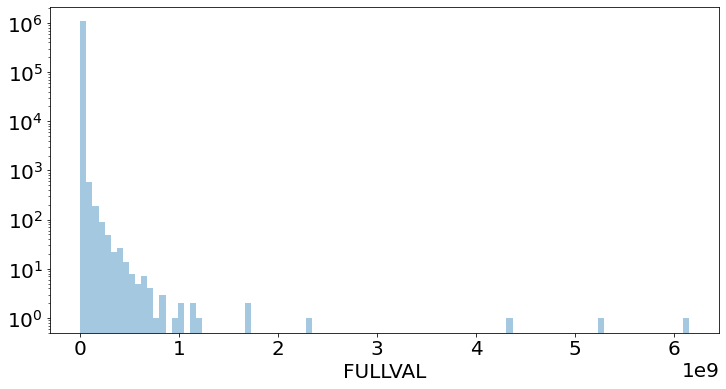

In [80]:
temp = data[data['FULLVAL'] >= 0]
ax = sns.distplot(temp['FULLVAL'],bins=100, kde=False)
ax.set_yscale('log')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

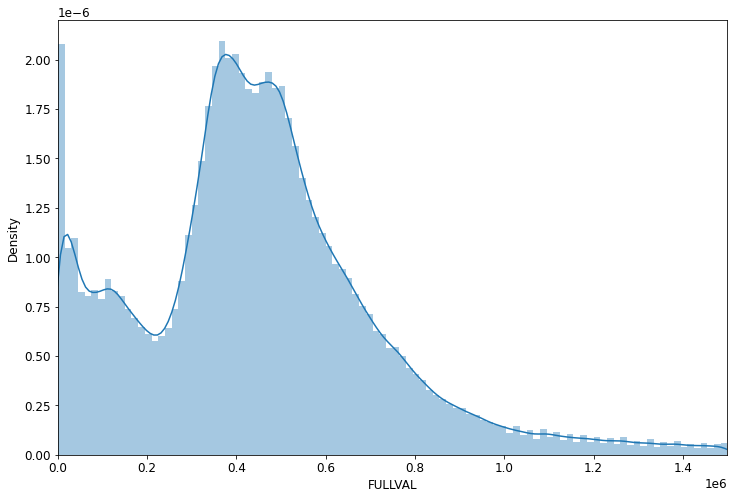

In [113]:
xhigh = 1500000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Count of properties across Market Value')

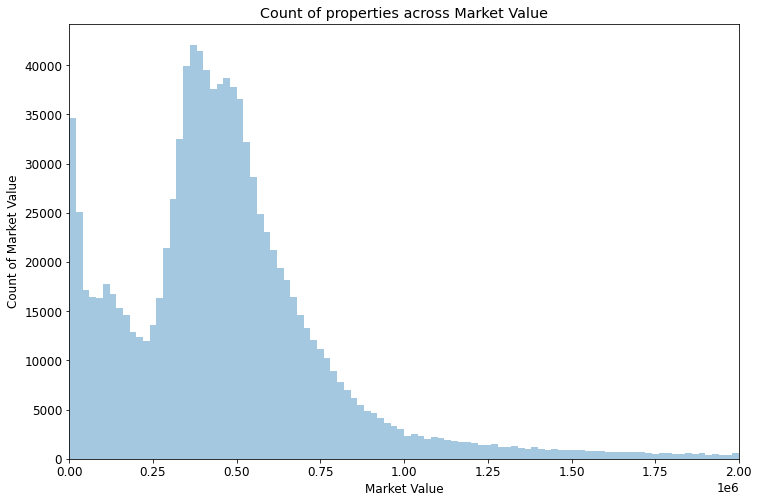

In [115]:
xhigh = 2000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=False)
plt.xlabel('Market Value')
plt.ylabel("Count of Market Value")
plt.title('Count of properties across Market Value')
# plt.savefig('dist good.png')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

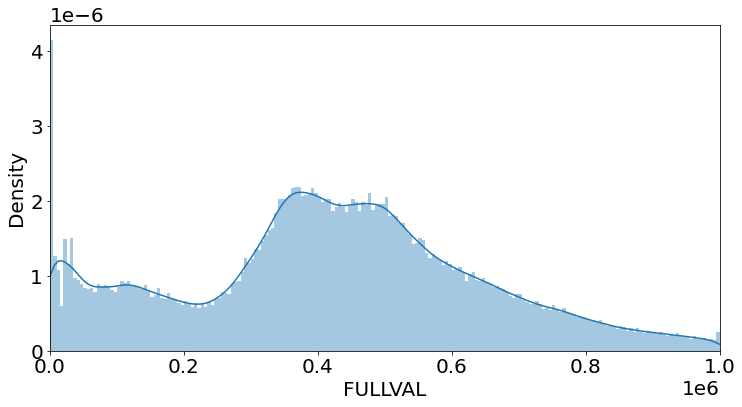

In [83]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=200, kde=True)


In [111]:
# xhigh = 1000000
# plt.xlim(0,xhigh)
# temp = data[data['FULLVAL'] <= xhigh]
# sns.distplot(temp['FULLVAL'],bins=200, kde=False)

In [117]:
# data['FULLVAL'].unique()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Count of properties across Market Value')

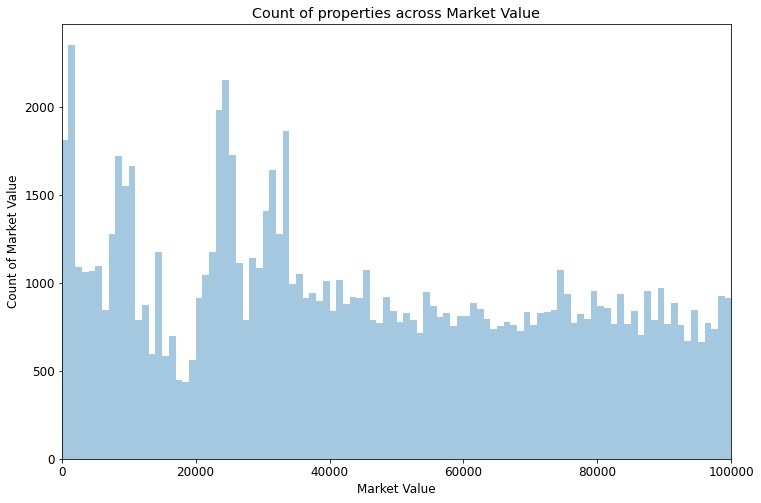

In [118]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[(data['FULLVAL'] <= xhigh) & (data['FULLVAL']) > 0]
sns.distplot(temp['FULLVAL'],bins=100, kde=False)
plt.xlabel('Market Value')
plt.ylabel("Count of Market Value")
plt.title('Count of properties across Market Value')

In [85]:
len(data[data['FULLVAL'] == 0])

13007

In [86]:
data['AVLAND'].count() * 100 / numrecords

100.0

In [224]:
len(data['AVLAND'].unique())

70921

<AxesSubplot:xlabel='AVLAND'>

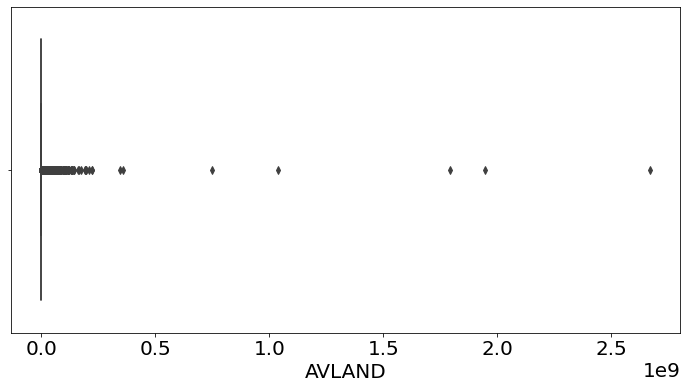

In [87]:
sns.boxplot(x='AVLAND', data=data)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVLAND'>

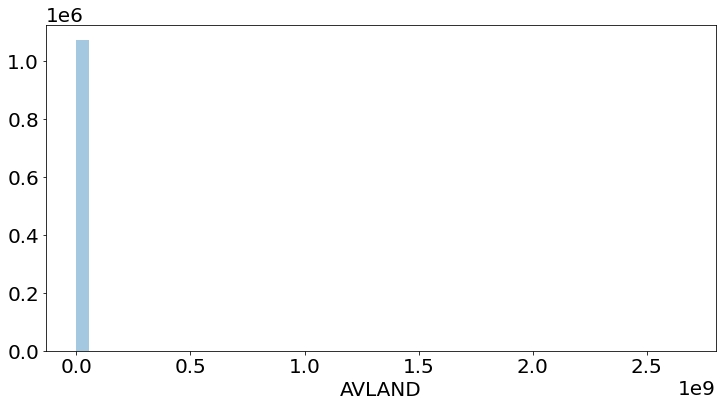

In [88]:
sns.distplot(data['AVLAND'],kde=False)

In [89]:
len(data[data['AVLAND']==0])

13009

In [90]:
len(data[data['AVLAND']==1])

3

In [91]:
len(data[data["AVLAND"]==2])

13

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Count of properties across Actual Land Value')

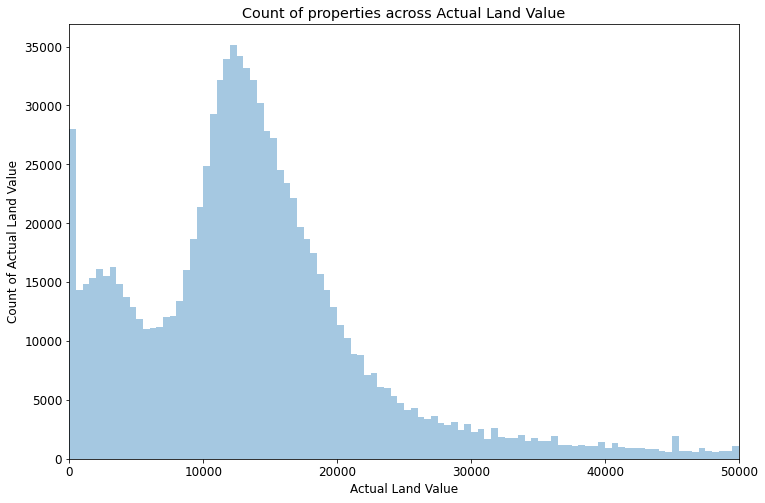

In [124]:
xhigh = 50000
plt.xlim(0,xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.distplot(temp['AVLAND'],bins=100, kde=False)
plt.xlabel('Actual Land Value')
plt.ylabel("Count of Actual Land Value")
plt.title('Count of properties across Actual Land Value')

In [93]:
data['AVTOT'].count() * 100 / numrecords

100.0

In [225]:
len(data['AVTOT'].unique())

112914

<AxesSubplot:xlabel='AVTOT'>

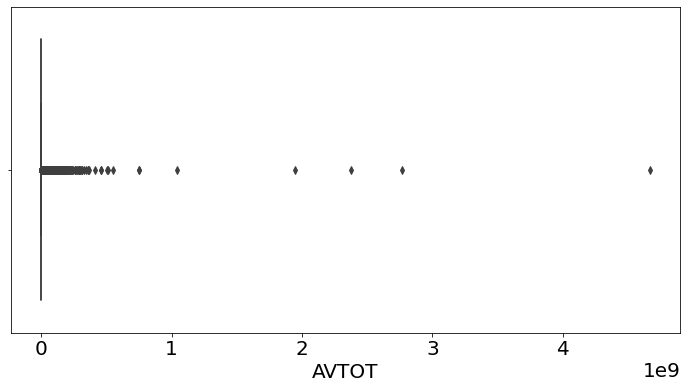

In [94]:
sns.boxplot(x='AVTOT', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Count of properties across Actual Total Value')

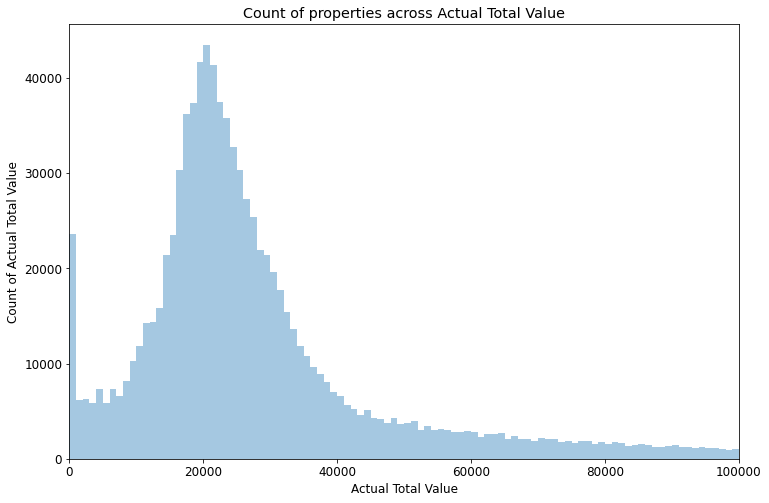

In [126]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.distplot(temp['AVTOT'],bins=100, kde=False)
plt.xlabel('Actual Total Value')
plt.ylabel("Count of Actual Total Value")
plt.title('Count of properties across Actual Total Value')

In [96]:
len(data[data['AVTOT']==0])

13007

In [97]:
len(data[data['AVTOT']==1])

3

In [98]:
len(data[data["AVTOT"]==2])

2

In [99]:
data['EXLAND'].count() * 100 / numrecords

100.0

In [226]:
len(data['EXLAND'].unique())

33419

<AxesSubplot:xlabel='EXLAND'>

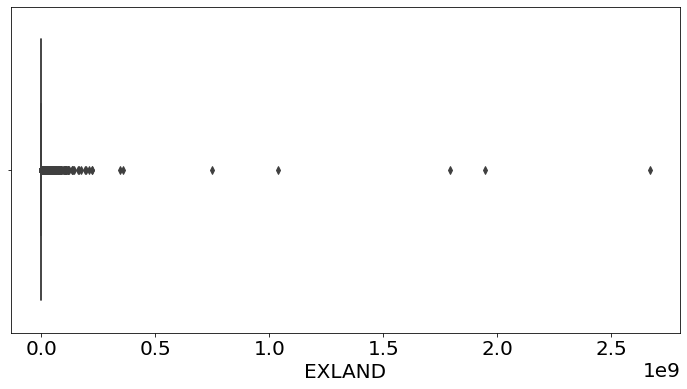

In [100]:
sns.boxplot(x='EXLAND', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Count of properties across Actual Exempt Land Value')

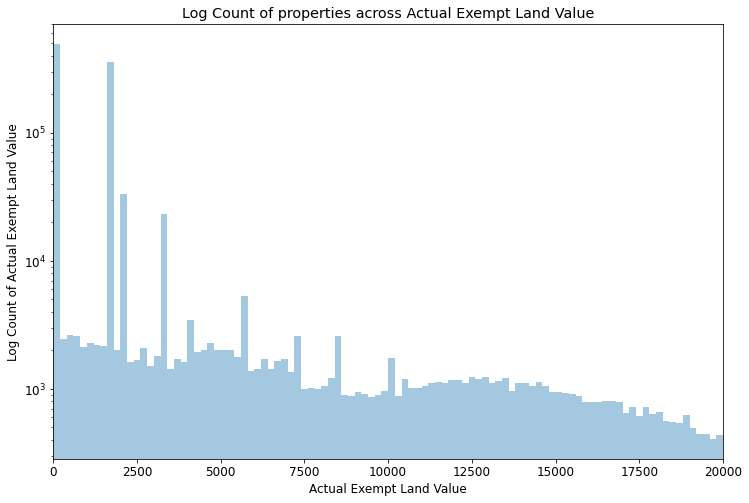

In [196]:
xhigh = 20000
plt.xlim(0,xhigh)
temp = data[data['EXLAND'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['EXLAND'],bins=100, kde=False)
plt.xlabel('Actual Exempt Land Value')
plt.ylabel("Log Count of Actual Exempt Land Value")
plt.title('Log Count of properties across Actual Exempt Land Value')

In [102]:
len(data[data['EXLAND']==0])

491699

In [103]:
len(data[data['EXLAND']==1])

8

In [104]:
len(data[data["EXLAND"]==2])

15

In [105]:
data['EXTOT'].count() * 100 / numrecords

100.0

In [227]:
len(data['EXTOT'].unique())

64255

<AxesSubplot:xlabel='EXTOT'>

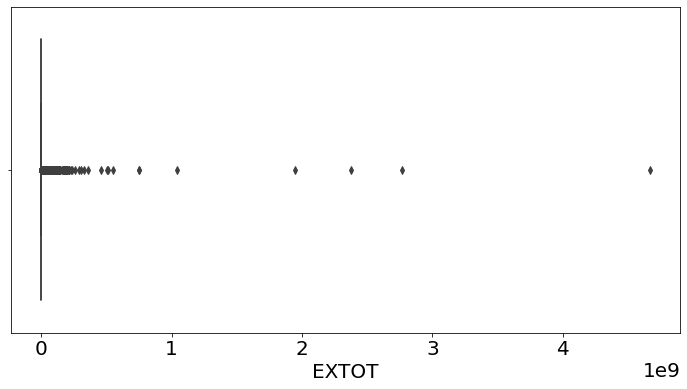

In [106]:
sns.boxplot(x='EXTOT', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Count of properties across Actual Exempt Land Total')

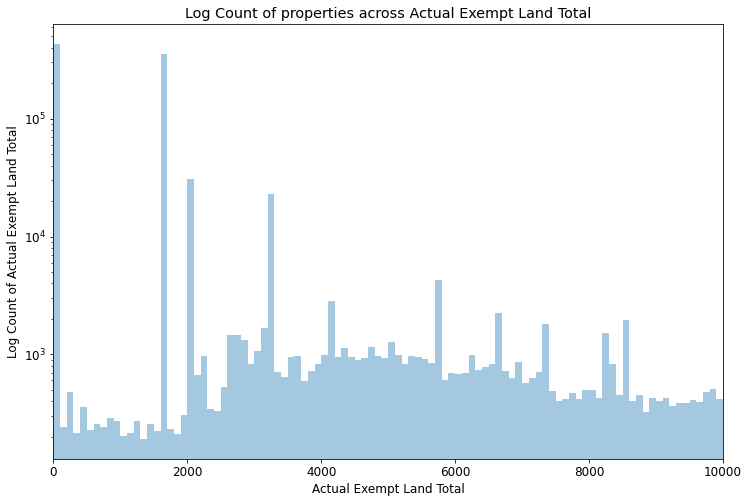

In [199]:
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['EXTOT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['EXTOT'],bins=100, kde=False)
plt.xlabel('Actual Exempt Land Total')
plt.ylabel("Log Count of Actual Exempt Land Total")
plt.title('Log Count of properties across Actual Exempt Land Total')

In [108]:
len(data[data['EXTOT']==0])

432572

In [109]:
len(data[data['EXTOT']==1])

10

In [110]:
len(data[data["EXTOT"]==2])

2

In [111]:
data['EXCD1'].count() * 100 / numrecords

59.616393742635346

<AxesSubplot:xlabel='EXCD1'>

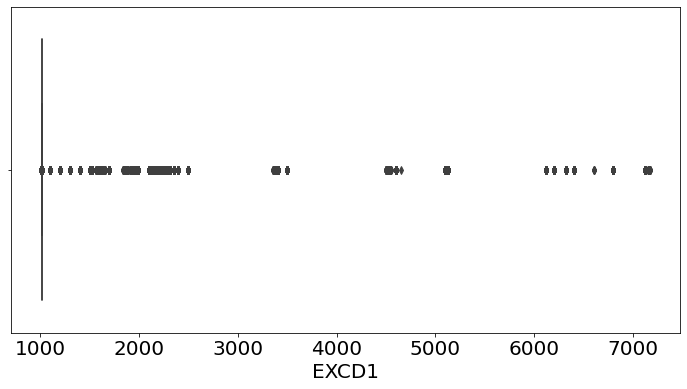

In [112]:
sns.boxplot(x='EXCD1', data=data)

In [114]:
len(data[data['EXCD1']==0])

0

In [115]:
len(data[data['EXCD1']==1])

0

In [228]:
len(data['EXCD1'].unique())

130

In [116]:
len(data[data["EXCD1"]==2])

0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Count of properties across Exemption Code 1')

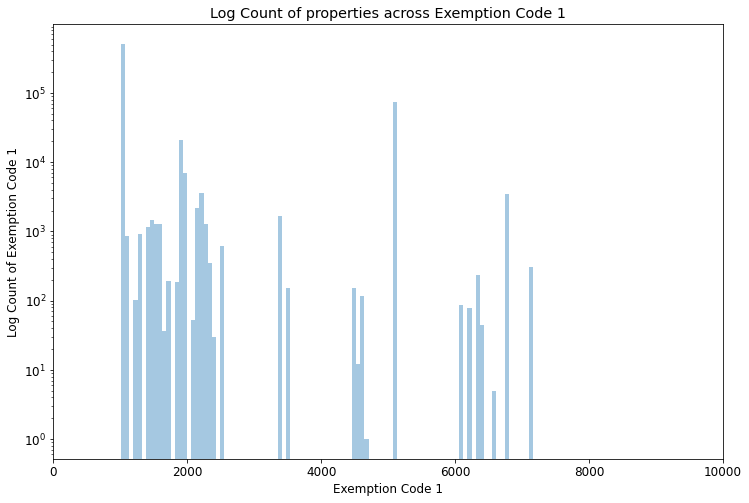

In [209]:
# len(data['EXCD1'].unique())
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['EXCD1'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['EXCD1'],bins=100, kde=False)
plt.xlabel('Exemption Code 1')
plt.ylabel("Log Count of Exemption Code 1")
plt.title('Log Count of properties across Exemption Code 1')

In [117]:
data['STADDR'].count() * 100 / numrecords

99.93688106562689

In [118]:
len(data['STADDR'].unique())

839281

In [119]:
data['STADDR'].value_counts()

501 SURF AVENUE        902
330 EAST 38 STREET     817
322 WEST 57 STREET     720
155 WEST 68 STREET     671
20 WEST 64 STREET      657
                      ... 
78 BEECHWOOD PLACE       1
56-23 218 STREET         1
54 EVANS STREET          1
7515 AQUATIC DRIVE       1
949 EAST 103 STREET      1
Name: STADDR, Length: 839280, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '501 SURF AVENUE'),
  Text(1, 0, '330 EAST 38 STREET'),
  Text(2, 0, '322 WEST 57 STREET'),
  Text(3, 0, '155 WEST 68 STREET'),
  Text(4, 0, '20 WEST 64 STREET'),
  Text(5, 0, '1 IRVING PLACE'),
  Text(6, 0, '220 RIVERSIDE BOULEVARD'),
  Text(7, 0, '360 FURMAN STREET'),
  Text(8, 0, '200 EAST 66 STREET'),
  Text(9, 0, '30 WEST 63 STREET'),
  Text(10, 0, '350 WEST 42 STREET'),
  Text(11, 0, '2 BAY CLUB DRIVE'),
  Text(12, 0, '200 RECTOR PLACE'),
  Text(13, 0, '301 EAST 79 STREET'),
  Text(14, 0, '350 WEST 50 STREET'),
  Text(15, 0, '630 1 AVENUE'),
  Text(16, 0, '635 WEST 42 STREET'),
  Text(17, 0, '88 GREENWICH STREET'),
  Text(18, 0, '150 WEST 51 STREET'),
  Text(19, 0, '99 JOHN STREET')])

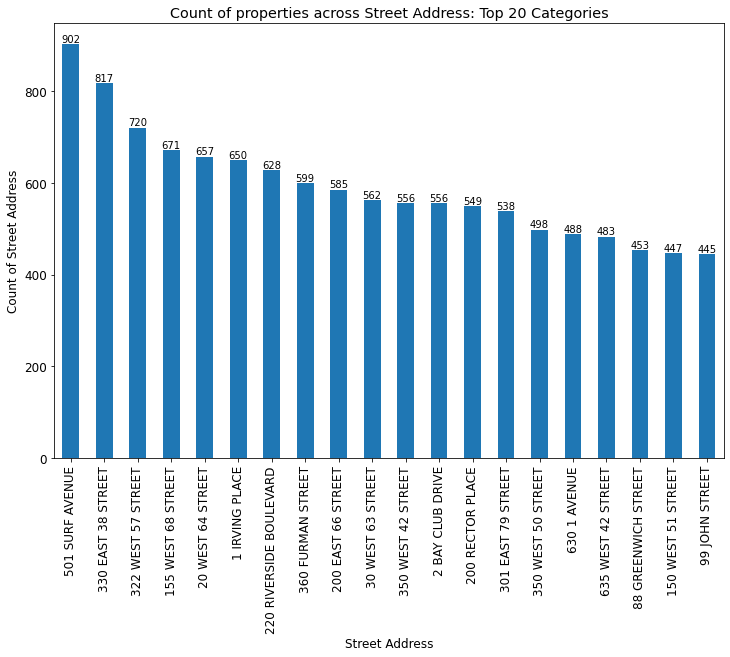

In [108]:
STADDR = data['STADDR'].value_counts().head(20)
data['STADDR'].value_counts().head(20).plot(kind='bar')
j= 0
for i in STADDR.index:    
        plt.text(j,STADDR[i],STADDR[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 0)
        j = j+1
plt.xticks(rotation=0)
plt.xlabel('Street Address')
plt.ylabel("Count of Street Address")
plt.title('Count of properties across Street Address: Top 20 Categories')
plt.xticks(rotation=90)

In [121]:
data['ZIP'].count() * 100 / numrecords

97.20913469169761

In [122]:
len(data['ZIP'].unique())

197

In [123]:
data['ZIP'].value_counts()

10314.0    24606
11234.0    20001
10312.0    18127
10462.0    16905
10306.0    16578
           ...  
11241.0        1
11005.0        1
11359.0        1
11371.0        1
11352.0        1
Name: ZIP, Length: 196, dtype: int64

Text(0, 0.5, 'Count')

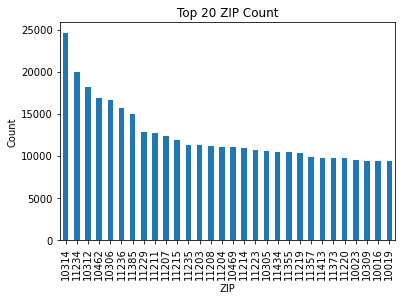

In [43]:
data['ZIP'] = data['ZIP'].astype(pd.Int64Dtype())
data['ZIP'].value_counts().head(30).plot(kind='bar')
plt.title('Top 20 ZIP Count')
plt.xlabel('ZIP')
plt.ylabel('Count')

In [125]:
data['EXMPTCL'].count() * 100 / numrecords

1.4546299979271593

In [126]:
len(data['EXMPTCL'].unique())

15

In [127]:
data['EXMPTCL'].value_counts()

X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
5        1
R4       1
A9       1
VI       1
KI       1
Name: EXMPTCL, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'X1'),
  Text(1, 0, 'X5'),
  Text(2, 0, 'X7'),
  Text(3, 0, 'X2'),
  Text(4, 0, 'X6'),
  Text(5, 0, 'X4'),
  Text(6, 0, 'X8'),
  Text(7, 0, 'X3'),
  Text(8, 0, 'X9'),
  Text(9, 0, 'VI'),
  Text(10, 0, '5'),
  Text(11, 0, 'R4'),
  Text(12, 0, 'KI'),
  Text(13, 0, 'A9')])

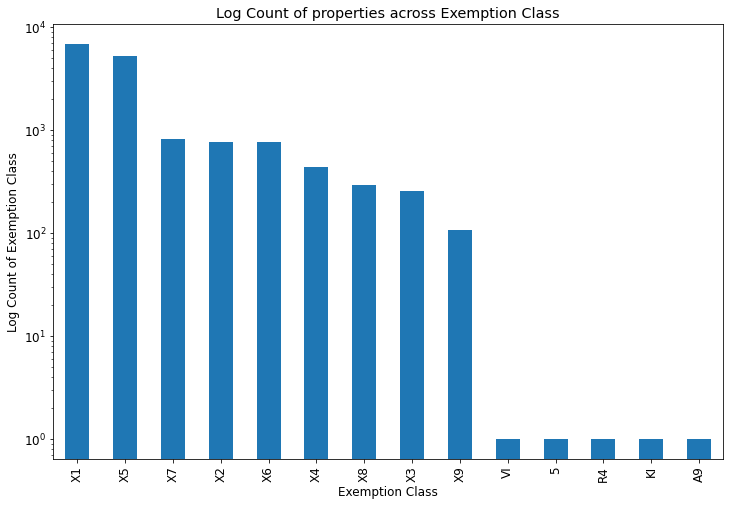

In [106]:
plt.yscale('log')
data['EXMPTCL'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Exemption Class')
plt.ylabel("Log Count of Exemption Class")
plt.title('Log Count of properties across Exemption Class')
plt.xticks(rotation=90)

In [104]:
# data['EXMPTCL'].value_counts().head(20).plot(kind='bar')
# plt.xticks(rotation=0)

In [235]:
len(data['BLDFRONT'].unique())
# data['BLDFRONT'].count() * 100 / numrecords

612

<AxesSubplot:xlabel='BLDFRONT'>

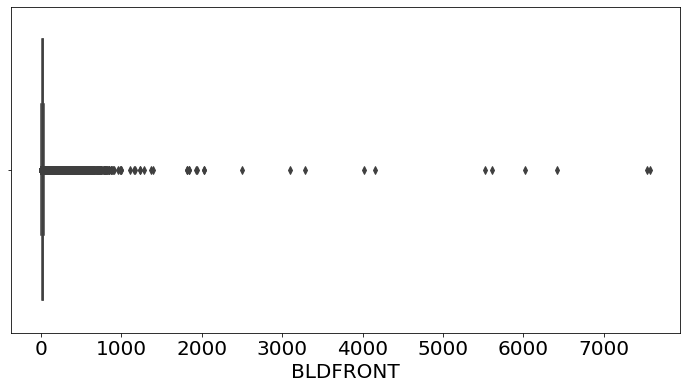

In [129]:
sns.boxplot(x='BLDFRONT', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of properties across Building Width')

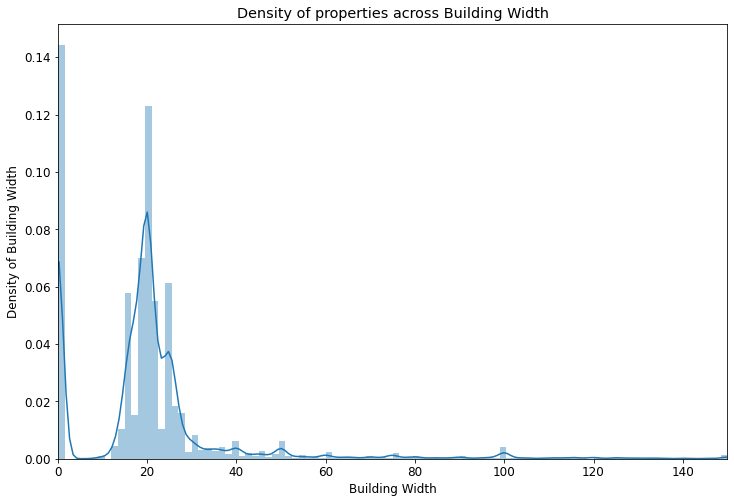

In [146]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=100, kde=True)
plt.xticks(rotation=0)
plt.xlabel('Building Width')
plt.ylabel("Density of Building Width")
plt.title('Density of properties across Building Width')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT'>

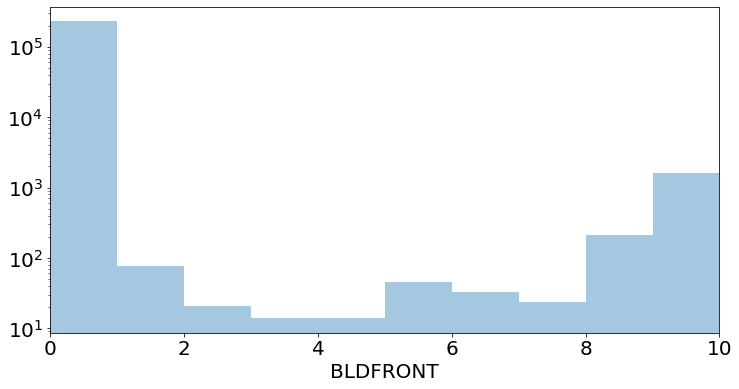

In [131]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDFRONT'],bins=10, kde=False)

<AxesSubplot:xlabel='BLDDEPTH'>

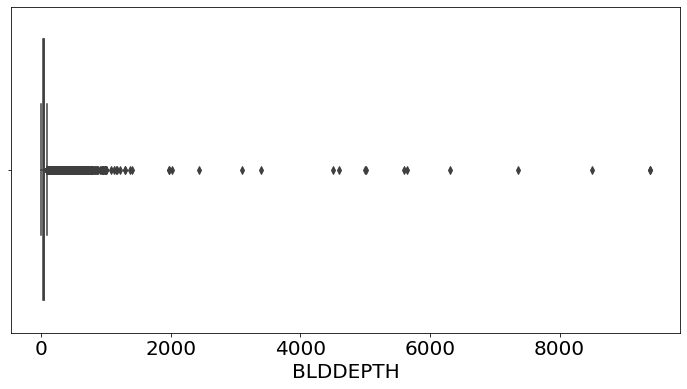

In [132]:
sns.boxplot(x='BLDDEPTH', data=data)

In [234]:
len(data['BLDDEPTH'].unique())
# data['BLDDEPTH'].count() * 100 / numrecords

621

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of properties across Building Depth')

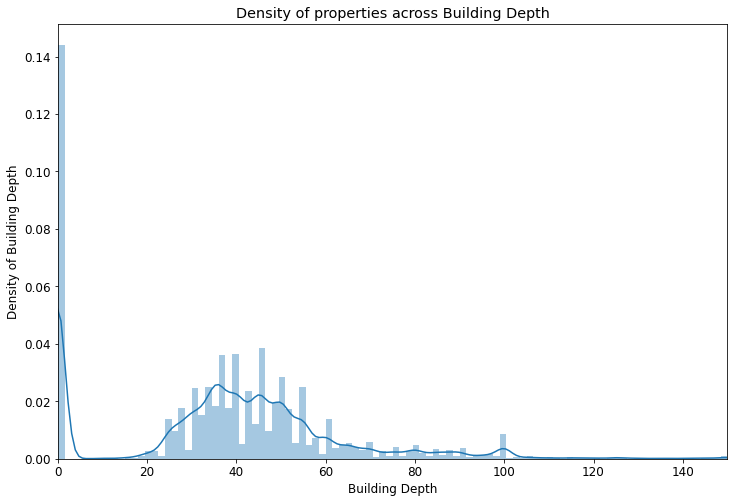

In [145]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins=100, kde=True)
plt.xlabel('Building Depth')
plt.ylabel("Density of Building Depth")
plt.title('Density of properties across Building Depth')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH'>

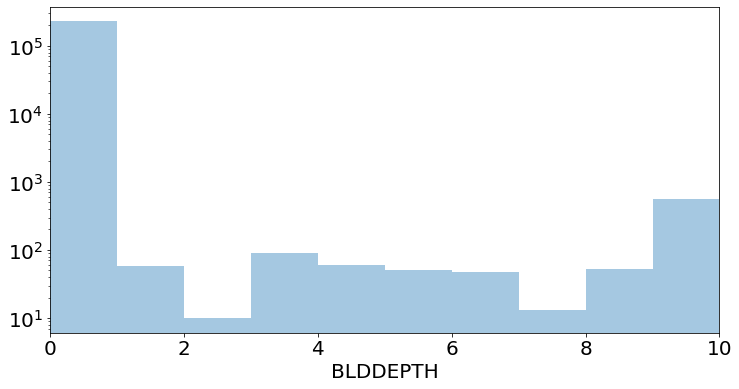

In [134]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDDEPTH'],bins=10, kde=False)

<AxesSubplot:xlabel='BLDFRONT'>

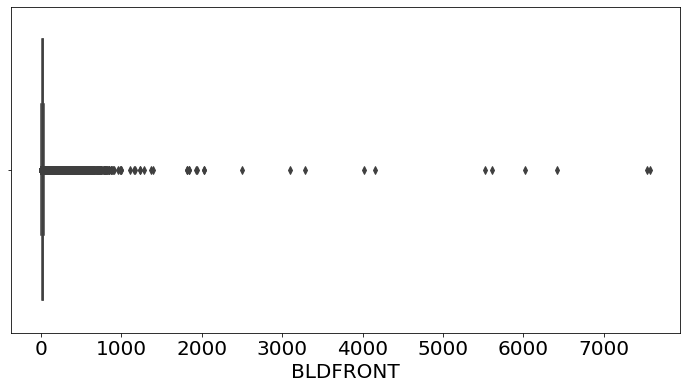

In [135]:
sns.boxplot(x='BLDFRONT', data=data)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT'>

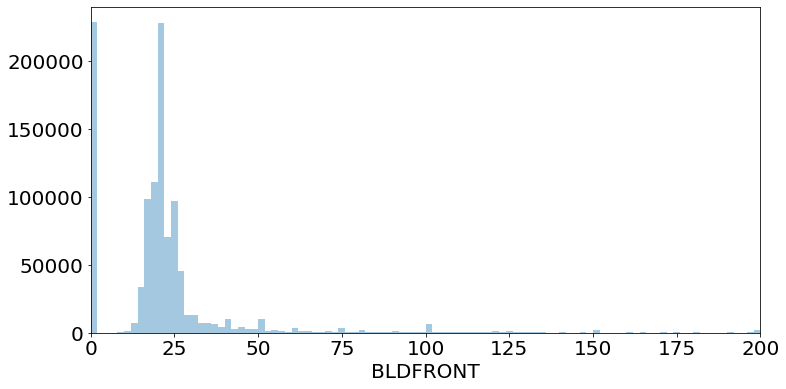

In [136]:
xhigh = 200
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=100, kde=False)

In [137]:
len(data[data['BLDFRONT']==0])

228815

In [138]:
len(data[data['BLDFRONT']==1])

77

In [139]:
len(data[data["BLDFRONT"]==2])

21

In [140]:
data['BLDDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='BLDDEPTH'>

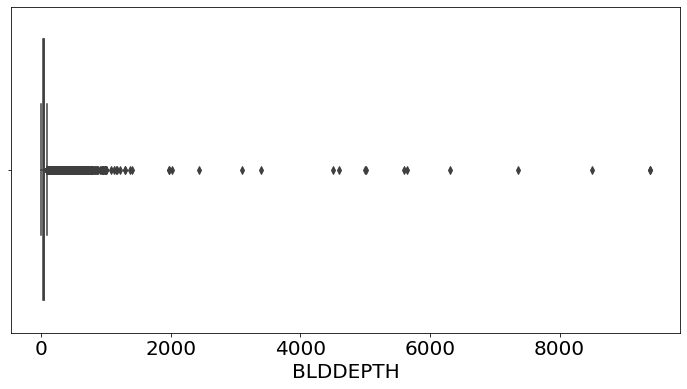

In [141]:
sns.boxplot(x='BLDDEPTH', data=data)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH'>

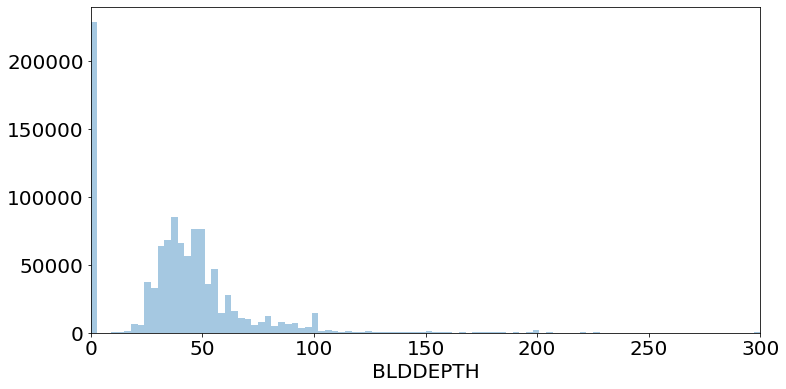

In [142]:
xhigh = 300
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins=100, kde=False)

In [143]:
len(data[data['BLDDEPTH']==0])

228853

In [144]:
len(data[data['BLDDEPTH']==1])

59

In [145]:
len(data[data["BLDDEPTH"]==2])

10

In [146]:
data['AVLAND2'].count() * 100 / numrecords

26.398467218303743

In [236]:
len(data['AVLAND2'].unique())

58592

<AxesSubplot:xlabel='AVLAND2'>

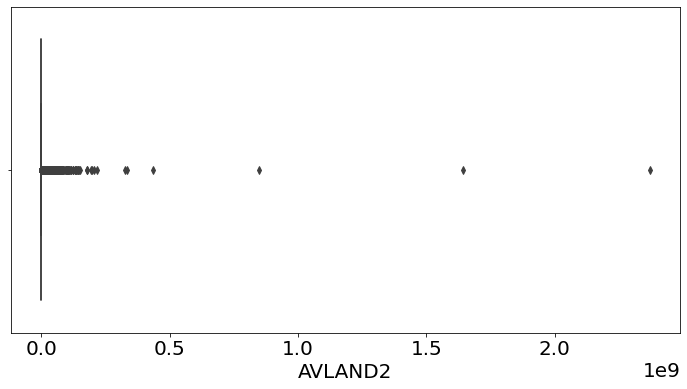

In [147]:
sns.boxplot(x='AVLAND2', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Count of properties across Transitional Land Value')

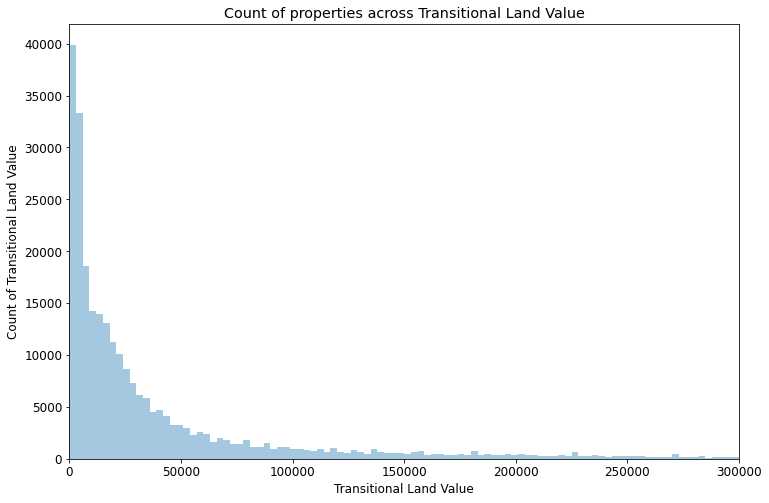

In [149]:
xhigh = 300000
plt.xlim(0,xhigh)
temp = data[data['AVLAND2'] <= xhigh]
sns.distplot(temp['AVLAND2'],bins=100, kde=False)
plt.xlabel('Transitional Land Value')
plt.ylabel("Count of Transitional Land Value")
plt.title('Count of properties across Transitional Land Value')

In [149]:
data['AVTOT2'].count() * 100 / numrecords

26.399027445531907

In [238]:
len(data['AVTOT2'].unique())
data['AVTOT2'].unique()

array([8.613000e+06, 8.069040e+07, 4.017951e+07, ..., 1.669420e+05,
       8.327100e+04, 1.836000e+04])

<AxesSubplot:xlabel='AVTOT2'>

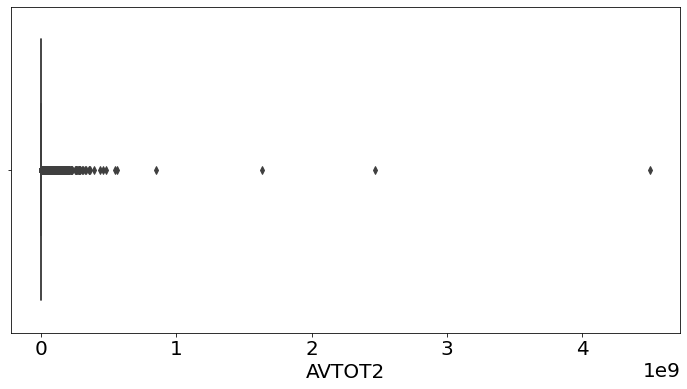

In [150]:
sns.boxplot(x='AVTOT2', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of properties across Transitional Total Value')

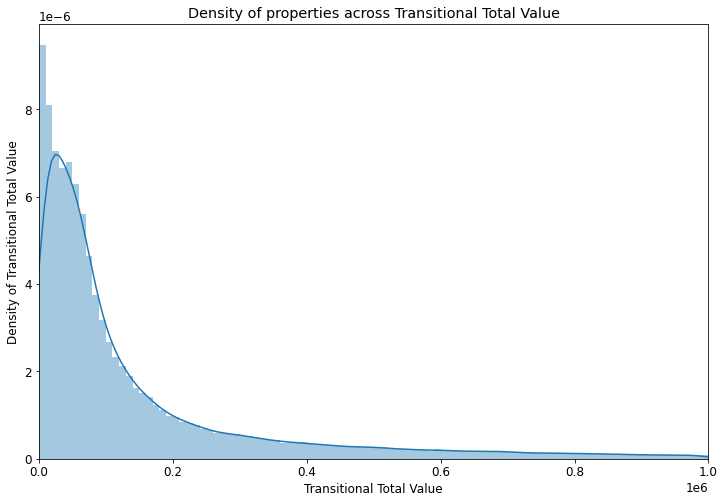

In [240]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['AVTOT2'] <= xhigh]
sns.distplot(temp['AVTOT2'],bins=100, kde=True)
plt.xlabel('Transitional Total Value')
plt.ylabel("Density of Transitional Total Value")
plt.title('Density of properties across Transitional Total Value')

In [152]:
data['EXLAND2'].count() * 100 / numrecords

8.165218479281863

<AxesSubplot:xlabel='EXLAND2'>

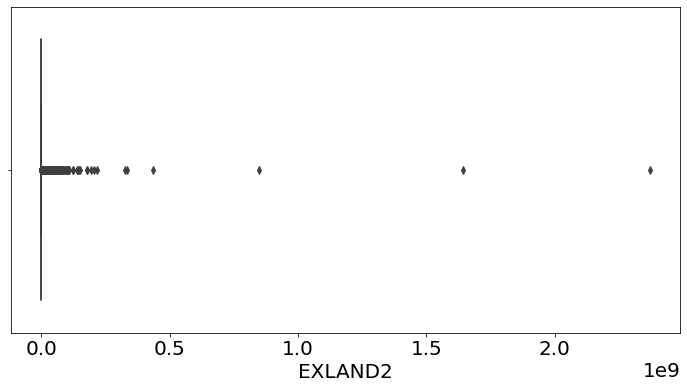

In [153]:
sns.boxplot(x='EXLAND2', data =data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Count of properties across Transitional Exemption Land Value')

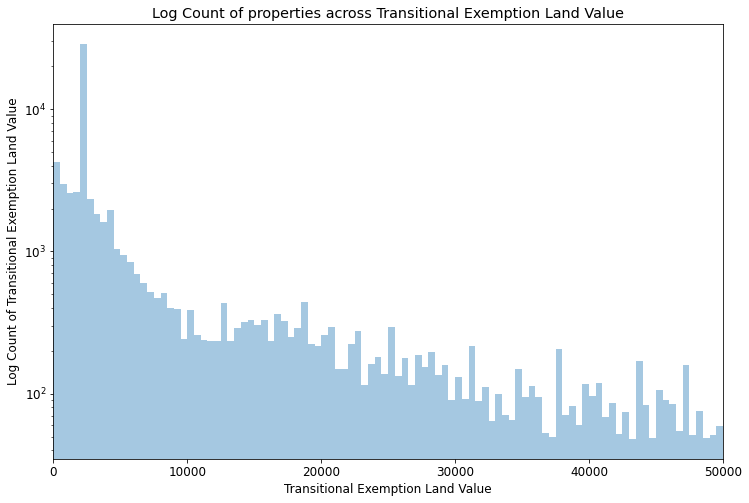

In [160]:
xhigh = 50000
plt.xlim(0,xhigh)
temp = data[data['EXLAND2'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['EXLAND2'],bins=100, kde=False)
plt.xlabel('Transitional Exemption Land Value')
plt.ylabel("Log Count of Transitional Exemption Land Value")
plt.title('Log Count of properties across Transitional Exemption Land Value')

In [155]:
data['EXTOT2'].count() * 100 / numrecords

12.215567967701032

In [241]:
# data['EXTOT2'].isnull().sum()
len(data['EXTOT2'].unique())

48349

<AxesSubplot:xlabel='EXTOT2'>

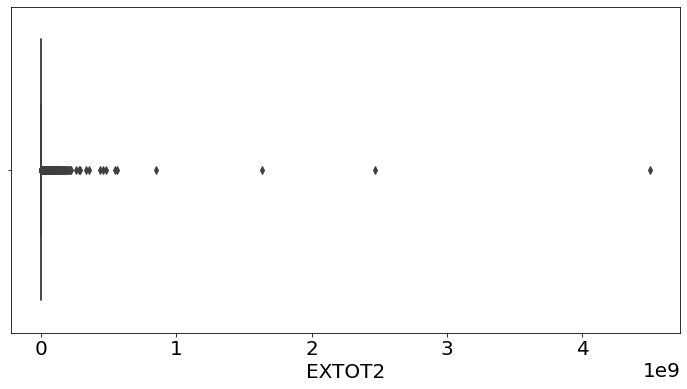

In [156]:
sns.boxplot(x='EXTOT2', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Count of properties across Transitional Exemption Land Total')

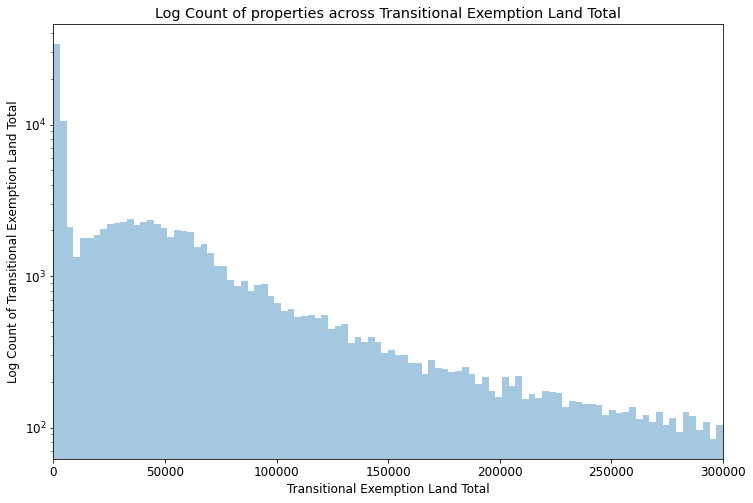

In [167]:
xhigh = 300000
plt.xlim(0,xhigh)
temp = data[data['EXTOT2'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['EXTOT2'],bins=100, kde=False)
plt.xlabel('Transitional Exemption Land Total')
plt.ylabel("Log Count of Transitional Exemption Land Total")
plt.title('Log Count of properties across Transitional Exemption Land Total')

In [158]:
data['EXCD2'].count() * 100 / numrecords

8.678666733893934

<AxesSubplot:xlabel='EXCD2'>

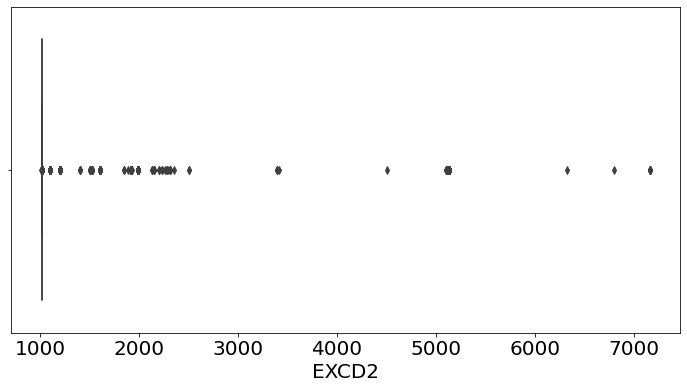

In [159]:
sns.boxplot(x='EXCD2', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Count of properties across Exemption Code 2')

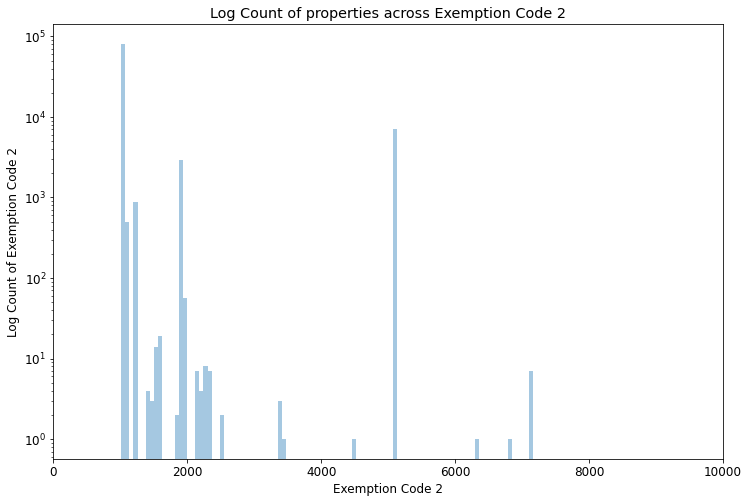

In [242]:
data['EXCD2'] = data['EXCD2'].dropna()
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['EXCD2'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['EXCD2'],bins=100, kde=False)
plt.xlabel('Exemption Code 2')
plt.ylabel("Log Count of Exemption Code 2")
plt.title('Log Count of properties across Exemption Code 2')

In [161]:
data['PERIOD'].count() * 100 / numrecords

100.0

In [162]:
len(data['PERIOD'].unique())

1

In [180]:
data['PERIOD'].unique()

array(['FINAL'], dtype=object)

In [163]:
data['PERIOD'].value_counts()

FINAL    1070994
Name: PERIOD, dtype: int64

Text(0.5, 1.0, 'Count of properties across Assessment Period')

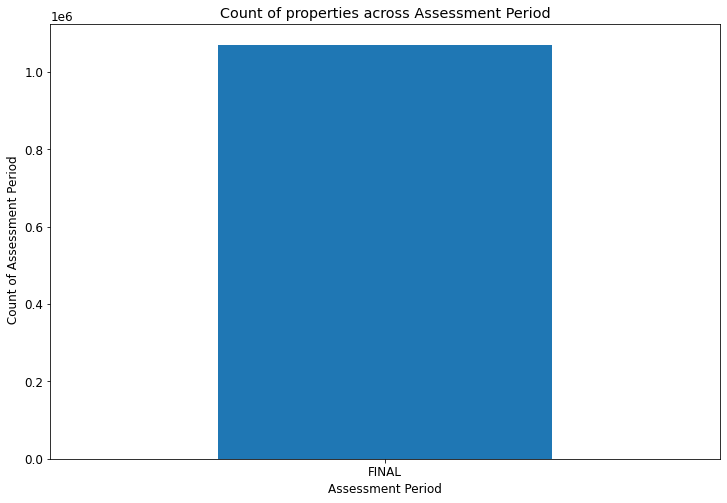

In [181]:
data['PERIOD'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Assessment Period')
plt.ylabel(" Count of Assessment Period")
plt.title('Count of properties across Assessment Period')

In [165]:
data['YEAR'].count() * 100 / numrecords

100.0

In [166]:
len(data['YEAR'].unique())

1

In [167]:
data['YEAR'].value_counts()

2010/11    1070994
Name: YEAR, dtype: int64

Text(0.5, 1.0, 'Count of properties across Assessment Year')

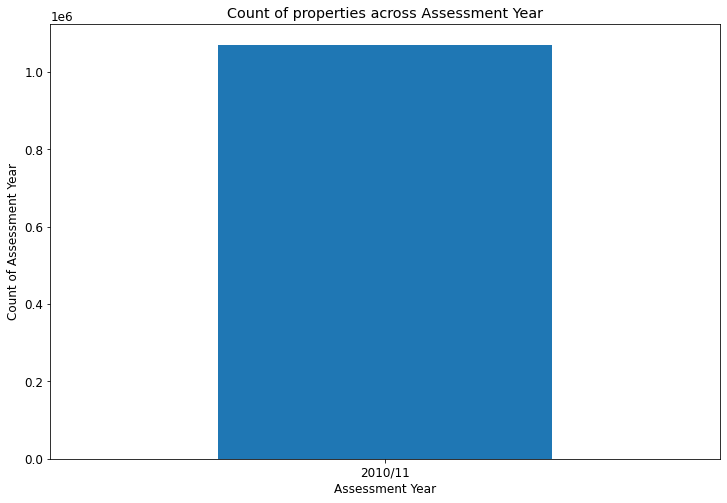

In [182]:
data['YEAR'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Assessment Year')
plt.ylabel("Count of Assessment Year")
plt.title('Count of properties across Assessment Year')


In [169]:
data['VALTYPE'].count() * 100 / numrecords

100.0

Text(0.5, 1.0, 'Count of properties across VALTYPE')

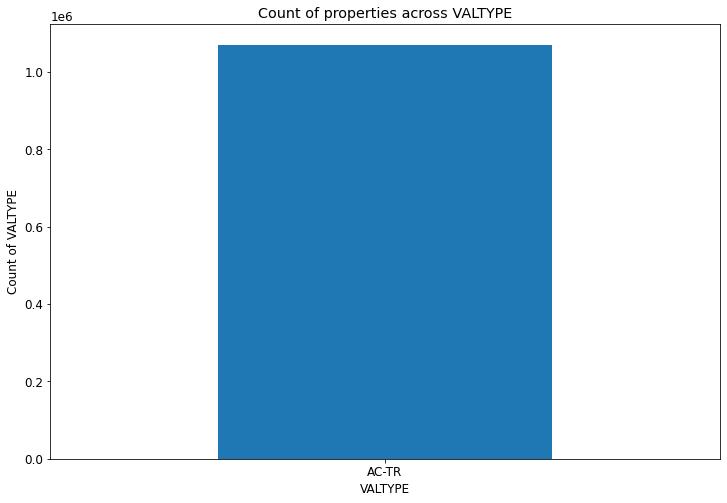

In [184]:
data['VALTYPE'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('VALTYPE')
plt.ylabel("Count of VALTYPE")
plt.title('Count of properties across VALTYPE')

In [171]:
print('duration: ', datetime.now() - start_time)

duration:  0:01:16.166222
